In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("../Data/preprocessed/fakenews_preprocessed.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62126 entries, 0 to 62125
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  62126 non-null  object 
 1   text                   62126 non-null  object 
 2   subject                62126 non-null  object 
 3   real                   62126 non-null  int64  
 4   clean_title            62126 non-null  object 
 5   clean_text             62126 non-null  object 
 6   text_len               62126 non-null  int64  
 7   avg_word_len           61679 non-null  float64
 8   num_sents              62126 non-null  int64  
 9   polarity               62126 non-null  float64
 10  subjectivity           62126 non-null  float64
 11  prep_text              61678 non-null  object 
 12  sentence_count         62126 non-null  int64  
 13  grade_level            60671 non-null  float64
 14  flesch_ease            60671 non-null  float64
 15  fl

In [4]:
df.head()

,title,text,subject,real,clean_title,clean_text,text_len,avg_word_len,num_sents,polarity,...,flesch_grade,gunning_fog,smog,ari,coleman_liau,flesch_interpretation,punct_count,word_count,punct_ratio,entity_count
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,0,donald trump sends out embarrassing new ear s...,donald trump just couldn t wish all americans ...,503,4.337972,1,-0.014387,...,8.726552,10.363443,11.812371,9.679789,9.062195,Standard - 8th-9th grade,121,495,0.244444,28
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,0,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,309,4.951456,1,0.033536,...,10.942923,13.072860,12.745085,11.595993,11.947541,Difficult - College,39,305,0.127869,24
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,0,sheriff david clarke becomes an internet joke...,on frida it was revealed that former milwaukee...,598,4.658863,1,-0.020018,...,8.616870,10.647496,11.645159,10.957494,10.928843,Standard - 8th-9th grade,148,580,0.255172,37
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,0,trump is so obsessed he even has obama s name...,on christmas da donald trump announced that he...,458,4.665939,1,-0.026923,...,9.966244,12.498177,13.023867,11.788649,11.285261,Fairly Difficult - 10th-12th grade,118,444,0.265766,26
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,0,pope francis just called out donald trump dur...,pope francis used his annual christmas da mess...,425,4.322353,1,-0.069810,...,9.766190,12.209524,11.505630,10.522929,8.655714,Standard - 8th-9th grade,40,420,0.095238,24


In [5]:
df["prep_text"].isna().sum()

np.int64(448)

In [17]:
df = df.dropna(subset=["prep_text"])

In [18]:
X = df["prep_text"].values
y = df["real"].values

In [19]:
X.shape

(61678,)

In [20]:
y.shape

(61678,)

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
def evaluate_model(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }

In [30]:
results = []

# TF-IDF

In [31]:
tfidf = TfidfVectorizer(binary=True)

In [32]:
X_train = tfidf.fit_transform(X_train)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7820432 stored elements and shape (49342, 173799)>

In [33]:
X_val = tfidf.transform(X_val)
X_val

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1923766 stored elements and shape (12336, 173799)>

# Logistic Regression

In [34]:
model_lr = LogisticRegression()

In [35]:
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred = model_lr.predict(X_val)

In [38]:
metrics_lr = evaluate_model("Logistic Regression", y_val, y_pred)
metrics_lr

{'Model:': 'Logistic Regression',
 'Accuracy': 0.9893806744487679,
 'Precision': 0.9864373601789709,
 'Recall': 0.9952038369304557,
 'F1': 0.9908012077803525}

In [44]:
results.append(metrics_lr)

# Ridge Regression

In [40]:
model_rr = RidgeClassifier()

In [41]:
model_rr.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,None


In [42]:
y_pred_rr = model_rr.predict(X_val)

In [43]:
metrics_rr = evaluate_model("Ridge Classifier", y_val, y_pred_rr)
metrics_rr

{'Model:': 'Ridge Classifier',
 'Accuracy': 0.9948929961089494,
 'Precision': 0.9920168067226891,
 'Recall': 0.9991536182818451,
 'F1': 0.9955724225173941}

In [45]:
results.append(metrics_rr)

# Random Forest Classifier

In [46]:
model_rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [47]:
model_rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
y_pred_rf = model_rf.predict(X_val)

In [49]:
metrics_rf = evaluate_model("Random Forest Classifier", y_val, y_pred_rf)
metrics_rf

{'Model:': 'Random Forest Classifier',
 'Accuracy': 0.9790856031128404,
 'Precision': 0.9678126284070675,
 'Recall': 0.996755536747073,
 'F1': 0.9820708825573314}

In [50]:
results.append(metrics_rf)

# Gradient Boosting

In [51]:
model_gbc = GradientBoostingClassifier(random_state=42)

In [52]:
model_gbc.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [53]:
y_pred_gbc = model_gbc.predict(X_val)

In [54]:
metrics_gbc = evaluate_model("Gradient Boosting Classifier", y_val, y_pred_gbc)
metrics_gbc

{'Model:': 'Gradient Boosting Classifier',
 'Accuracy': 0.9657911802853437,
 'Precision': 0.9666806663866723,
 'Recall': 0.9740442939765834,
 'F1': 0.9703485103991006}

In [55]:
results.append(metrics_gbc)

# XGBoost

In [56]:
model_xgb = XGBClassifier(random_state=42, eval_metric="logloss", n_estimators=200)

In [57]:
model_xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [58]:
y_pred_xgb = model_xgb.predict(X_val)

In [59]:
metrics_xgb = evaluate_model("XGBoost Classifier", y_val, y_pred_xgb)
metrics_xgb

{'Model:': 'XGBoost Classifier',
 'Accuracy': 0.9910830090791181,
 'Precision': 0.9900294902401348,
 'Recall': 0.9944985188319933,
 'F1': 0.9922589725545391}

In [60]:
results.append((metrics_xgb))

# Visualize the results

In [61]:
df_results = pd.DataFrame(results)

In [62]:
df_results

,Model:,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.989381,0.986437,0.995204,0.990801
1,Ridge Classifier,0.994893,0.992017,0.999154,0.995572
2,Random Forest Classifier,0.979086,0.967813,0.996756,0.982071
3,Gradient Boosting Classifier,0.965791,0.966681,0.974044,0.970349
4,XGBoost Classifier,0.991083,0.990029,0.994499,0.992259


In [64]:
df_melt = df_results.melt(id_vars="Model", var_name="Metric", value_name="Score")

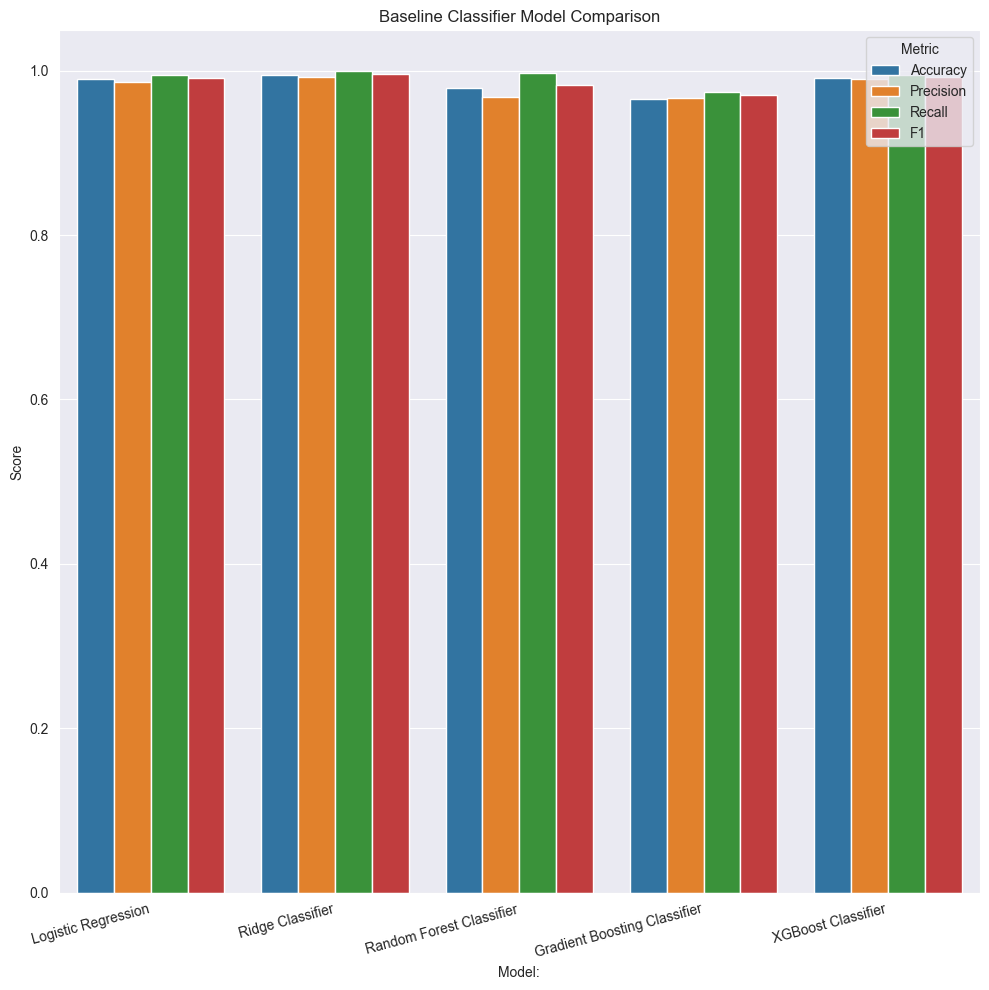

In [68]:
plt.figure(figsize = (10,10))
sns.barplot(data=df_melt, x="Model", y="Score", hue="Metric")
plt.title("Baseline Classifier Model Comparison")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("../images/classicModels.png")
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

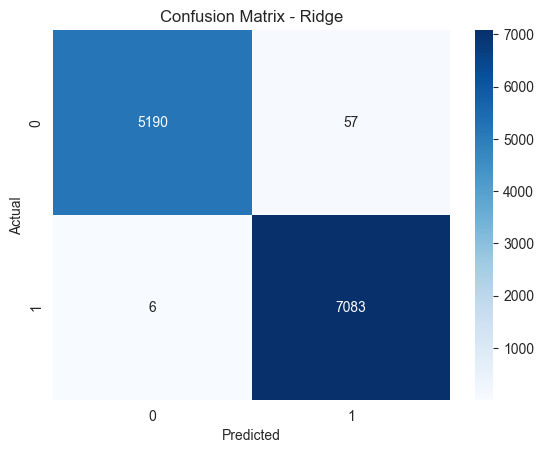


Ridge:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5247
           1       0.99      1.00      1.00      7089

    accuracy                           0.99     12336
   macro avg       1.00      0.99      0.99     12336
weighted avg       0.99      0.99      0.99     12336



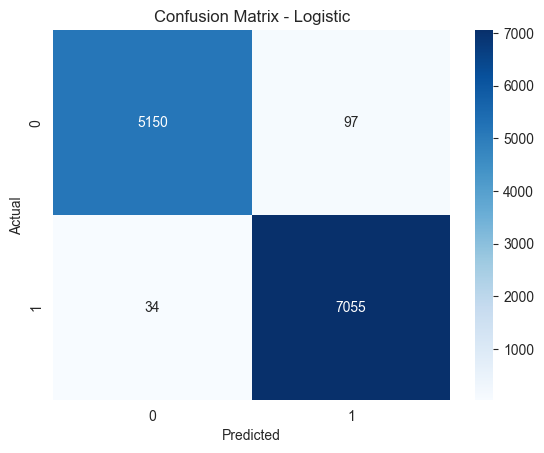


Logistic:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      5247
           1       0.99      1.00      0.99      7089

    accuracy                           0.99     12336
   macro avg       0.99      0.99      0.99     12336
weighted avg       0.99      0.99      0.99     12336



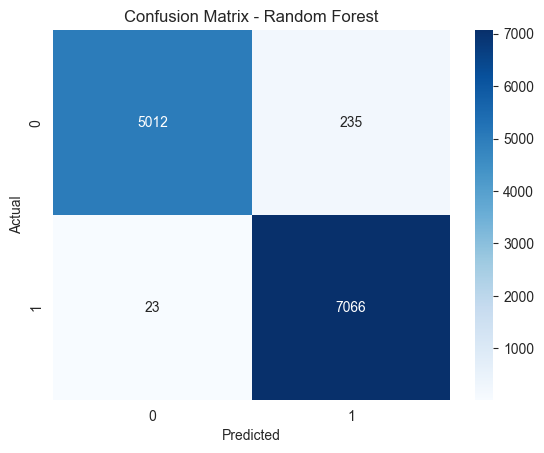


Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.96      0.97      5247
           1       0.97      1.00      0.98      7089

    accuracy                           0.98     12336
   macro avg       0.98      0.98      0.98     12336
weighted avg       0.98      0.98      0.98     12336



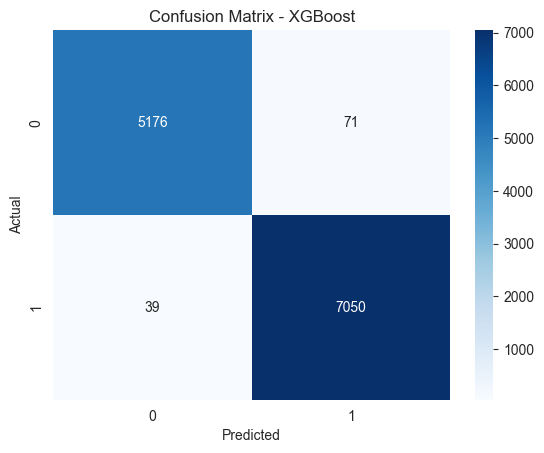


XGBoost:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5247
           1       0.99      0.99      0.99      7089

    accuracy                           0.99     12336
   macro avg       0.99      0.99      0.99     12336
weighted avg       0.99      0.99      0.99     12336



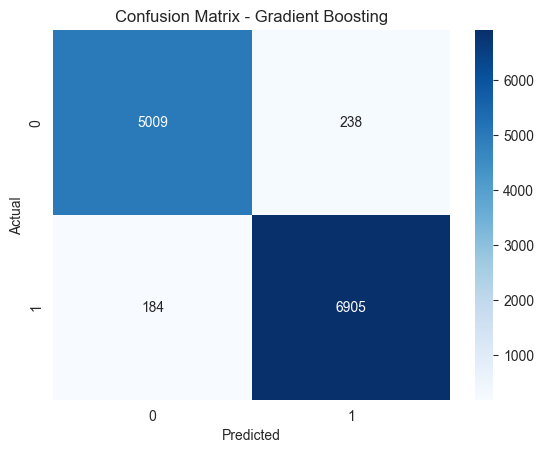


Gradient Boosting:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      5247
           1       0.97      0.97      0.97      7089

    accuracy                           0.97     12336
   macro avg       0.97      0.96      0.96     12336
weighted avg       0.97      0.97      0.97     12336



In [73]:
for name, model in [("Ridge", model_rr), ("Logistic", model_lr), ("Random Forest", model_rf), ("XGBoost", model_xgb), ("Gradient Boosting", model_gbc) ]:
    y_pred = model.predict(X_val)

    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\n{name}:\n", classification_report(y_val, y_pred))

In [70]:
df["real"].value_counts(normalize=True)

real
1    0.577483
0    0.422517
Name: proportion, dtype: float64

In [71]:
from sklearn.model_selection import cross_val_score

In [85]:
cv_scores = cross_val_score(model_rr, X_train, y_train, cv=10, scoring="accuracy")

In [86]:
print(cv_scores, cv_scores.mean())

[0.99452888 0.99554205 0.99391974 0.99391974 0.99554114 0.99351439
 0.99594649 0.99473044 0.99412242 0.99371707] 0.9945482352873534


In [74]:
from sklearn.model_selection import cross_validate

In [75]:
scoring = {
    "f1_fake": "f1_macro",
    "f1_weighted": "f1_weighted"
}

In [87]:
scores = cross_validate(model_rr, X_train, y_train, cv=5, scoring=scoring)

In [88]:
print(scores)
print(cv_scores, cv_scores.mean())

{'fit_time': array([0.92049289, 1.15086341, 1.23097062, 1.28628778, 1.04959822]), 'score_time': array([0.00750494, 0.0110352 , 0.01729345, 0.00621009, 0.01585269]), 'test_f1_fake': array([0.99459399, 0.99323548, 0.99376059, 0.9944898 , 0.99323907]), 'test_f1_weighted': array([0.99472853, 0.99340716, 0.99391651, 0.99462688, 0.99340855])}
[0.99452888 0.99554205 0.99391974 0.99391974 0.99554114 0.99351439
 0.99594649 0.99473044 0.99412242 0.99371707] 0.9945482352873534


In [ ]:
plt.plot(cv_scores, marker="o")

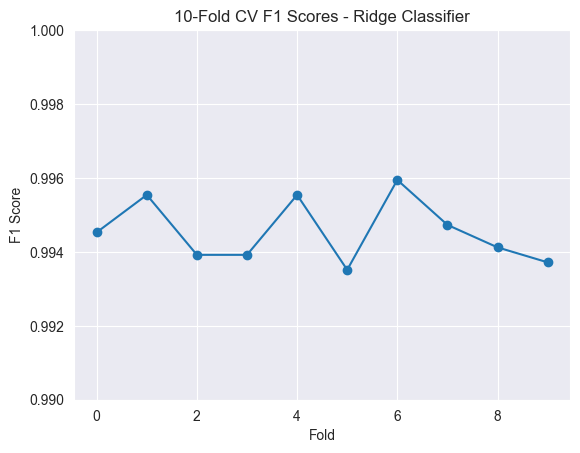

In [89]:
plt.plot(cv_scores, marker='o')
plt.title("10-Fold CV F1 Scores - Ridge Classifier")
plt.ylabel("F1 Score")
plt.xlabel("Fold")
plt.ylim(0.99, 1.0)
plt.grid(True)
plt.show()